# EDA: Google Playstore Data

# Project Preview

<img src="../assets/picture.jpg" alt="Title-Pic">

## Data StoryTelling

This dataset came from <a href="https://datacamp.com">datacamp.com</a> and contains data of the Google Playstore. <br>
We want to find out, which kind of apps are the most popular e.g. by the rating and download rates.

<br>

## Data questions

### Main-Topics

#### Which kind of apps got the best rating?

- genre (check)
- content ratings (check)
- free / paid apps
- price category at paid apps
- review count of app
- app size

#### Which kind of apps got the most downloads?

- genre (check)
- rating (check)
- free / paid apps
- price category at paid apps
- review count of app
- app size

<br>

### General-Topics

#### Genre

- What are the most published genres? (check)

#### App Rating

- How is the total rating distribution over all apps (0.5 - 5 categories)?
- Got a app with many reviews an better rating? Is there a significant threshold?
- Is there an relationship between the rating and the size of the app? Do bigger apps got an better rating, because of the higher functionality density?
- How is the rating distribution of the different content ratings?
- Are higher rated apps more downloaded?

#### App Reviews

- Are high reviewed apps more downloaded

#### Free & Paid Apps

- How is the distribution of paid and free apps?
- Do paid apps get a better rating than free apps?
- In terms of total releases, are paid apps downloaded more than free apps?
- Does the price affect the rating (3 price categories)? Do high price apps got an better rating?
- Does the price affect the downloads (3 price categories)? Do high price apps got an better download rate?
- Which price category got the best rating-download combination when we want the highest turnover?

#### Other

- Are bigger apps more downloaded then smaller apps?
- Which content rating categories will downloaded the most?

## Imports

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame


np.set_printoptions(suppress=True)

sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})
sns.set_palette("Set2")

## Data overview

In [371]:
DATA_PATH = "../data/apps.csv"
raw_data_df = pd.read_csv(DATA_PATH, delimiter=",")
raw_data_df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [372]:
df_cleaned = raw_data_df.copy()
df_cleaned.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [373]:
df_cleaned.shape[0]

9659

In [374]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


Missing values:
- Rating
- Size
- Current Ver
- Android Ver

In [375]:
df_cleaned.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [376]:
df_cleaned.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


## Data cleaning & preprocessing

- Drop columns: {Unnamed: 0, Android Ver, Current Ver, Last Updated}
- Rename columns: {Installs: Downloads, Content Rating: Content Group}

<br>

- Category (is fine)
- Rating
- Reviews
- Size
- Installs
- Type
- Price
- Content Rating
- Genres  

<br>

- Genre -> ";" split and copy row!
- drop all ratings under 15 reviews (each had the chance to get voted)
- ratings -> 0 - 5 .5 steps
- ratings -> 0 - 5 1 steps (.5 rounded)

### Columns and constants

In [377]:
df_cleaned.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [378]:
# columns
UNNAMED = "Unnamed: 0"
APP_NAME = "App"
CATEGORY = "Category"
RATING = "Rating"
REVIEWS = "Reviews"
SIZE = "Size"
INSTALLS = "Installs"
TYPE = "Type"
PRICE = "Price"
CONTENT_RATING = "Content Rating"
GENRE = "Genres"
LAST_UPDATED = "Last Updated"
CURR_VERSION = "Current Ver"
ANDROID_VERSION = "Android Ver"

# added columns
DOWNLOADS = "Downloads"
DOWNLOAD_RATE = "Download Rate"
CONTENT_GROUP = "Content Group"
RATING_CLASS = "Rating Class"
REVIEW_RATE = "Review Rate"
SIZE_CLASS = "Size Class"
PRICE_CLASS = "Price Class"

# notebook constants
COUNT = "count"
MEAN = "mean"
SUM = "sum"
MEDIAN = "median"

TOP = "Top"
HIGH = "High"
MEDIUM = "Medium"
LOW = "Low"
POINT = "point"

### Drop columns: {Unnamed: 0, Category, Android Ver, Current Ver, Last Updated}

In [379]:
df_cleaned.drop(columns={UNNAMED, CATEGORY, ANDROID_VERSION, CURR_VERSION, LAST_UPDATED}, inplace=True)
df_cleaned.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

### Rename columns: {Installs: Downloads, Content Rating: Content Group}

In [380]:
renaming_map = {INSTALLS: DOWNLOADS, CONTENT_RATING: CONTENT_GROUP}
df_cleaned.rename(columns=renaming_map, inplace=True)
df_cleaned.columns

Index(['App', 'Rating', 'Reviews', 'Size', 'Downloads', 'Type', 'Price',
       'Content Group', 'Genres'],
      dtype='object')

### Rating (1/2)

In [381]:
df_cleaned[RATING]

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
9654    4.5
9655    5.0
9656    NaN
9657    4.5
9658    4.5
Name: Rating, Length: 9659, dtype: float64

In [382]:
na_values = df_cleaned[RATING].isna().sum()
total_values = df_cleaned.shape[0]
na_values, total_values, na_values / total_values

(1463, 9659, 0.15146495496428203)

15% of the data doesn't contain rating values. <br>
We interpolate them by the genre median.

In [383]:
na_values_genre = df_cleaned.loc[df_cleaned[RATING].isna(), GENRE].unique()
na_values_genre

array(['Art & Design;Action & Adventure', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Dating', 'Education', 'Events',
       'Food & Drink', 'House & Home', 'Libraries & Demo', 'Medical',
       'Tools', 'Parenting;Education', 'Parenting',
       'Video Players & Editors', 'Personalization', 'Racing',
       'Photography', 'Social', 'Arcade', 'Sports', 'Communication',
       'Music', 'Trivia', 'Productivity', 'Educational;Education',
       'Board', 'Entertainment', 'Auto & Vehicles', 'Finance',
       'Lifestyle', 'Travel & Local', 'Shopping', 'Health & Fitness',
       'Weather', 'Simulation', 'Casual', 'News & Magazines',
       'Maps & Navigation', 'Action', 'Card', 'Strategy', 'Educational',
       'Puzzle', 'Casino', 'Education;Brain Games', 'Trivia;Education',
       'Word', 'Art & Design', 'Books & Reference;Creativity',
       'Role Playing', 'Adventure', 'Arcade;Action & Adventure',
       'Educational;Pretend Play', 'Role Playing;Education'], dtype=object)

In [384]:
na_values_genre.shape[0], df_cleaned[GENRE].unique().shape[0]

(56, 118)

Before we can interpolate the rating by the genre, we need to clean the genre.

### Genre

In [385]:
df_cleaned[GENRE].value_counts()

Tools                              826
Entertainment                      561
Education                          510
Business                           420
Medical                            395
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: Genres, Length: 118, dtype: int64

In [386]:
df_cleaned[GENRE].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [387]:
df_cleaned[GENRE].unique().shape[0]

118

There are multiple genre in one record, separated by semicolon. <br>
We split them and copy the duplicate the record.

In [388]:
curr_row_count = df_cleaned.shape[0]
curr_row_count

9659

In [389]:
is_multiple_genre = df_cleaned[GENRE].str.contains(";")
df_multiple_genre = df_cleaned[is_multiple_genre]
df_multiple_genre.shape[0]

393

In [390]:
df_cleaned

,App,Rating,Reviews,Size,Downloads,Type,Price,Content Group,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,4.5,38,53.0,"5,000+",Free,0,Everyone,Education
9655,Fr. Mike Schmitz Audio Teachings,5.0,4,3.6,100+,Free,0,Everyone,Education
9656,Parkinson Exercices FR,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical
9657,The SCP Foundation DB fr nn5n,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference


In [391]:
added_row_count = 0
for row_index, row in df_multiple_genre.iterrows():
    genres = row[GENRE].split(";")
    for i in range(1, len(genres)):
        added_row_count = added_row_count + 1
        row[GENRE] = genres[i]
        df_cleaned = pd.concat([df_cleaned, DataFrame(row).T], ignore_index=True)

    df_cleaned.loc[row_index, GENRE] = genres[0]

df_cleaned.shape[0], added_row_count, df_cleaned.shape[0] - added_row_count, curr_row_count

(10052, 393, 9659, 9659)

In [392]:
df_cleaned

,App,Rating,Reviews,Size,Downloads,Type,Price,Content Group,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
10047,PBS KIDS Games,4.3,12919,94.0,"1,000,000+",Free,0,Everyone,Education
10048,Dolphin and fish coloring book,3.9,2249,NaN,"500,000+",Free,0,Everyone,Creativity
10049,Cake Shop - Kids Cooking,4.3,30668,33.0,"5,000,000+",Free,0,Everyone,Pretend Play
10050,Hair saloon - Spa salon,4.2,38473,23.0,"10,000,000+",Free,0,Everyone,Pretend Play


In [393]:
df_cleaned[GENRE].str.contains(";").sum()

0

In [394]:
df_cleaned[GENRE].unique().shape[0]

53

Unique values from 118 to 53.

### Rating (2/2)

In [395]:
df_cleaned[RATING].describe()

count     8575.0
unique      39.0
top          4.3
freq       952.0
Name: Rating, dtype: float64

#### Missing values

In [396]:
df_cleaned[RATING].isna().sum()

1477

The na values count increase just by 14 values

##### Interpolate na values by the genre median.

In [397]:
df_genre_median_map = df_cleaned.pivot_table(index=GENRE, values=RATING, aggfunc=MEDIAN).to_dict()[RATING]
df_genre_median_map

{'Action': 4.3,
 'Action & Adventure': 4.3,
 'Adventure': 4.3,
 'Arcade': 4.3,
 'Art & Design': 4.4,
 'Auto & Vehicles': 4.3,
 'Beauty': 4.3,
 'Board': 4.3,
 'Books & Reference': 4.5,
 'Brain Games': 4.4,
 'Business': 4.2,
 'Card': 4.25,
 'Casino': 4.4,
 'Casual': 4.2,
 'Comics': 4.4,
 'Communication': 4.2,
 'Creativity': 4.4,
 'Dating': 4.1,
 'Education': 4.4,
 'Educational': 4.2,
 'Entertainment': 4.2,
 'Events': 4.5,
 'Finance': 4.3,
 'Food & Drink': 4.3,
 'Health & Fitness': 4.5,
 'House & Home': 4.2,
 'Libraries & Demo': 4.2,
 'Lifestyle': 4.2,
 'Maps & Navigation': 4.2,
 'Medical': 4.3,
 'Music': 4.3,
 'Music & Audio': 4.3,
 'Music & Video': 4.2,
 'News & Magazines': 4.2,
 'Parenting': 4.4,
 'Personalization': 4.4,
 'Photography': 4.3,
 'Pretend Play': 4.2,
 'Productivity': 4.3,
 'Puzzle': 4.4,
 'Racing': 4.2,
 'Role Playing': 4.3,
 'Shopping': 4.3,
 'Simulation': 4.2,
 'Social': 4.3,
 'Sports': 4.3,
 'Strategy': 4.3,
 'Tools': 4.2,
 'Travel & Local': 4.2,
 'Trivia': 4.25,
 'Vide

In [398]:
is_rating_nan = df_cleaned[RATING].isna()
df_cleaned.loc[is_rating_nan, RATING] = df_cleaned.loc[is_rating_nan, GENRE].map(df_genre_median_map)
df_cleaned[RATING] = df_cleaned[RATING].astype("float64")
df_cleaned[RATING].isna().sum()

0

We ware able to eliminate all missing values in the ranting feature!

#### Abnormal Ratings

In [399]:
df_cleaned[df_cleaned[RATING] < 0].shape[0], df_cleaned[df_cleaned[RATING] > 5].shape[0]

(0, 0)

Looks fine!

#### Classification of Rating Class {1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5}

In [400]:
def get_rating_class(rating):
    end_interval = int(rating * 10 / 5) / 2 + 0.5
    end_interval = end_interval if end_interval < 5 and end_interval >= 0.5 else 5 if end_interval > 5 else 0.5
    start_interval = end_interval - 0.5
    last_symbol = "]" if end_interval == 5 else ")"
    return f"[{start_interval}, {end_interval}{last_symbol}"

df_cleaned[RATING_CLASS] = df_cleaned[RATING].apply(lambda rating: get_rating_class(rating)).astype("category")
df_cleaned[RATING_CLASS].value_counts().sort_index()

[0.0, 0.5)    2520
[1.0, 1.5)      20
[1.5, 2.0)      34
[2.0, 2.5)      73
[2.5, 3.0)     153
[3.0, 3.5)     445
[3.5, 4.0)    1234
[4.0, 4.5)    5301
[4.5, 5]       272
Name: Rating Class, dtype: int64

In [401]:
df_cleaned[(df_cleaned[RATING] >= 0.5) & (df_cleaned[RATING] < 1)].shape[0]

0

### Reviews

In [402]:
df_cleaned[REVIEWS].describe()

count     10052
unique     5330
top           0
freq        596
Name: Reviews, dtype: int64

#### Missing values

In [403]:
df_cleaned[REVIEWS].isna().sum()

0

#### Classification of reviews to Review Rate {High, Medium, Low}

In [404]:
q1, q2 = df_cleaned[REVIEWS].quantile(q=[1/3, 2/3])
df_cleaned[REVIEW_RATE] = df_cleaned[REVIEWS].apply(lambda review_count: LOW if review_count <= q1 else MEDIUM if review_count <= q2 else HIGH).astype("category")
df_cleaned[REVIEW_RATE].value_counts()

High      3351
Low       3351
Medium    3350
Name: Review Rate, dtype: int64

### Size

In [405]:
df_cleaned[SIZE].describe()

count     8781.0
unique     191.0
top         12.0
freq       185.0
Name: Size, dtype: float64

#### Missing values

In [406]:
is_size_na = df_cleaned[SIZE].isna()
is_size_na.sum()

1271

We interpolate the size by the median size of the genre.

In [407]:
genre_median_size_map = df_cleaned.pivot_table(index=GENRE, values=SIZE, aggfunc=MEDIAN).to_dict()[SIZE]
genre_median_size_map

{'Action': 45.0,
 'Action & Adventure': 39.0,
 'Adventure': 31.0,
 'Arcade': 36.0,
 'Art & Design': 8.95,
 'Auto & Vehicles': 16.0,
 'Beauty': 9.2,
 'Board': 17.0,
 'Books & Reference': 7.8,
 'Brain Games': 20.5,
 'Business': 8.6,
 'Card': 23.0,
 'Casino': 26.0,
 'Casual': 26.0,
 'Comics': 10.0,
 'Communication': 5.7,
 'Creativity': 28.0,
 'Dating': 11.0,
 'Education': 12.0,
 'Educational': 46.0,
 'Entertainment': 8.2,
 'Events': 9.7,
 'Finance': 12.0,
 'Food & Drink': 17.0,
 'Health & Fitness': 11.5,
 'House & Home': 9.45,
 'Libraries & Demo': 3.1,
 'Lifestyle': 9.6,
 'Maps & Navigation': 9.8,
 'Medical': 15.0,
 'Music': 36.0,
 'Music & Audio': 9.8,
 'Music & Video': 28.0,
 'News & Magazines': 9.0,
 'Parenting': 11.0,
 'Personalization': 7.1,
 'Photography': 9.649999999999999,
 'Pretend Play': 48.5,
 'Productivity': 6.9,
 'Puzzle': 29.0,
 'Racing': 45.0,
 'Role Playing': 47.0,
 'Shopping': 12.0,
 'Simulation': 41.0,
 'Social': 7.9,
 'Sports': 20.0,
 'Strategy': 45.5,
 'Tools': 4.2,
 '

In [408]:
df_cleaned.loc[is_size_na, SIZE] = df_cleaned.loc[is_size_na, GENRE].map(genre_median_size_map)
df_cleaned[SIZE].isna().sum()

0

#### Classification of size to Size Class {Low, Medium, High}

In [409]:
q1, q2 = df_cleaned[SIZE].quantile(q=[1/3, 2/3])
df_cleaned[SIZE_CLASS] = df_cleaned[SIZE].apply(lambda size: LOW if size <= q1 else MEDIUM if size <= q2 else HIGH).astype("category")
df_cleaned[SIZE_CLASS].value_counts()

Medium    3435
Low       3363
High      3254
Name: Size Class, dtype: int64

In [410]:
df_cleaned[APP_NAME].describe()

count                              10052
unique                              9659
top       Kids Learn Languages by Mondly
freq                                   2
Name: App, dtype: object

The reason why there is no equal distribution of the size classes is, that we duplicated some rows and so we got duplicates in the size columns. <br>
But thats fine, because the fact, that the genre is different, we've got an new record and we still can remove the duplicates by the app name column, if needed.

### Downloads

In [411]:
df_cleaned[DOWNLOADS].value_counts()

1,000,000+        1519
100,000+          1166
10,000+           1061
10,000,000+        999
1,000+             906
100+               716
5,000,000+         649
500,000+           538
50,000+            487
5,000+             477
10+                387
500+               332
50,000,000+        208
50+                206
100,000,000+       192
5+                  82
1+                  68
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Downloads, dtype: int64

In [412]:
df_cleaned[DOWNLOADS] = df_cleaned[DOWNLOADS].str.replace("+", "", regex=True).replace(" ", "", regex=True).replace(",", "", regex=True).astype("int")
df_cleaned[DOWNLOADS].value_counts().sort_index()

0               15
1               68
5               82
10             387
50             206
100            716
500            332
1000           906
5000           477
10000         1061
50000          487
100000        1166
500000         538
1000000       1519
5000000        649
10000000       999
50000000       208
100000000      192
500000000       24
1000000000      20
Name: Downloads, dtype: int64

#### Classification of downloads to {Low, Medium, High, Top}

In [413]:
q1, q2, q3, qtop10 = df_cleaned[DOWNLOADS].quantile(q=[1/4, 2/4, 3/4, 9/10])

df_cleaned[DOWNLOAD_RATE] = df_cleaned[DOWNLOADS].apply(lambda downloads: TOP if downloads >= qtop10 else HIGH if downloads >= q3 else MEDIUM if downloads >= q2 else LOW)
df_cleaned[DOWNLOAD_RATE].value_counts()

Low       4737
High      2168
Medium    1704
Top       1443
Name: Download Rate, dtype: int64

### Type

In [414]:
df_cleaned[TYPE].describe()

count     10052
unique        2
top        Free
freq       9226
Name: Type, dtype: object

In [415]:
df_cleaned[TYPE].isna().sum()

0

In [416]:
df_cleaned[TYPE].value_counts()

Free    9226
Paid     826
Name: Type, dtype: int64

Looks fine!

### Price

In [417]:
df_cleaned[PRICE].describe()

count     10052
unique       92
top           0
freq       9226
Name: Price, dtype: object

In [418]:
df_cleaned[PRICE].isna().sum()

0

In [419]:
df_cleaned[PRICE].value_counts()

0          9226
$2.99       151
$0.99       150
$1.99        80
$4.99        79
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [420]:
df_cleaned[PRICE] = df_cleaned[PRICE].str.replace("$", "", regex=True).astype("float64")
df_cleaned[PRICE].describe()

count    10052.000000
mean         1.079390
std         16.521963
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [421]:
is_price_over_0 = df_cleaned[PRICE] > 0
df_cleaned.loc[is_price_over_0, PRICE].quantile(q=[1/3, 2/3, 9/10, 99/100])

0.333333      1.99
0.666667      3.99
0.900000      9.99
0.990000    399.99
Name: Price, dtype: float64

In [422]:
q1, q2, qtop10 = df_cleaned.loc[is_price_over_0, PRICE].quantile(q=[1/3, 2/3, 9/10])

df_cleaned[PRICE_CLASS] = df_cleaned[PRICE].apply(lambda price: "Very High" if price >= qtop10 else LOW if price <= q1 else MEDIUM if price <= q2 else HIGH)
df_cleaned.loc[is_price_over_0, PRICE_CLASS].value_counts()

Low          294
Medium       273
High         164
Very High     95
Name: Price Class, dtype: int64

### Content Rating

In [423]:
df_cleaned[CONTENT_GROUP].isna().sum()

0

In [424]:
df_cleaned[CONTENT_GROUP].value_counts()

Everyone           8272
Teen               1036
Mature 17+          393
Everyone 10+        346
Adults only 18+       3
Unrated               2
Name: Content Group, dtype: int64

- Mature 17+ -> Adults
- Adults only 18+ -> Adults
- Everyone 10+ -> Everyone
- Unrated -> Everyone

In [425]:
content_rating_map = {"Mature 17+": "Adults", "Adults only 18+": "Adults", "Everyone 10+": "Everyone", "Unrated": "Everyone"}
df_cleaned[CONTENT_GROUP] = df_cleaned[CONTENT_GROUP].replace(content_rating_map)
df_cleaned[CONTENT_GROUP].value_counts()

Everyone    8620
Teen        1036
Adults       396
Name: Content Group, dtype: int64

### Clean Dataset

In [426]:
df_cleaned.isna().sum()

App              0
Rating           0
Reviews          0
Size             0
Downloads        0
Type             0
Price            0
Content Group    0
Genres           0
Rating Class     0
Review Rate      0
Size Class       0
Download Rate    0
Price Class      0
dtype: int64

In [427]:
df_cleaned

,App,Rating,Reviews,Size,Downloads,Type,Price,Content Group,Genres,Rating Class,Review Rate,Size Class,Download Rate,Price Class
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"[4.0, 4.5)",Medium,Medium,Low,Low
1,Coloring book moana,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,"[3.5, 4.0)",Medium,Medium,Medium,Low
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"[0.0, 0.5)",High,Medium,High,Low
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"[0.0, 0.5)",High,High,Top,Low
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,"[4.0, 4.5)",Medium,Low,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10047,PBS KIDS Games,4.3,12919,94.0,1000000,Free,0.0,Everyone,Education,"[4.0, 4.5)",High,High,High,Low
10048,Dolphin and fish coloring book,3.9,2249,28.0,500000,Free,0.0,Everyone,Creativity,"[3.5, 4.0)",Medium,High,Medium,Low
10049,Cake Shop - Kids Cooking,4.3,30668,33.0,5000000,Free,0.0,Everyone,Pretend Play,"[4.0, 4.5)",High,High,High,Low
10050,Hair saloon - Spa salon,4.2,38473,23.0,10000000,Free,0.0,Everyone,Pretend Play,"[4.0, 4.5)",High,High,Top,Low


## Data visualization & interpretation

### Which kind of apps got the best rating and which the best download rate?

#### Genre - Best rated genres

##### Exploring the data

**Big Pucture**

In [428]:
df_cleaned[GENRE].unique().shape[0]

53

In [429]:
genre_counts = df_cleaned[GENRE].value_counts()
genre_counts.tail(10)

Comics           56
Beauty           53
Card             49
Trivia           39
Casino           39
Creativity       33
Music & Video    31
Word             23
Music            22
Music & Audio     1
Name: Genres, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Genres'>

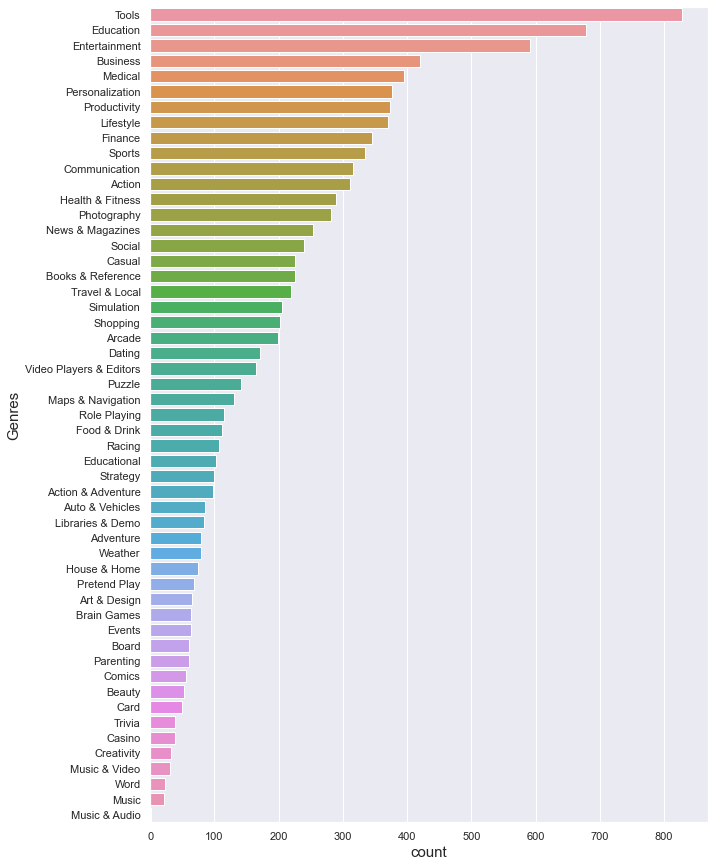

In [430]:
plt.figure(figsize=(10, 15))
sns.countplot(y=GENRE, data=df_cleaned, order=genre_counts.index)

Tools            827
Education        678
Entertainment    592
Business         420
Medical          395
Name: Genres, dtype: int64

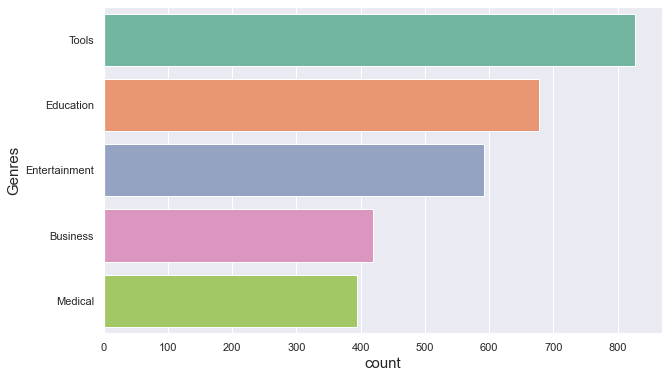

In [431]:
sns.countplot(y=GENRE, data=df_cleaned, order=genre_counts.index[:5])

genre_counts.head(5)

These are the most published genres in the Google PlayStore.

**Genres by rating**

In [432]:
most_popular_genres = df_cleaned.pivot_table(index=GENRE, values=RATING, aggfunc=MEAN).sort_values(RATING, ascending=False)
most_popular_genres.head(5)

,Rating
Genres,
Events,4.454688
Books & Reference,4.380889
Puzzle,4.374648
Brain Games,4.357812
Art & Design,4.352308


[(3.8, 4.6)]

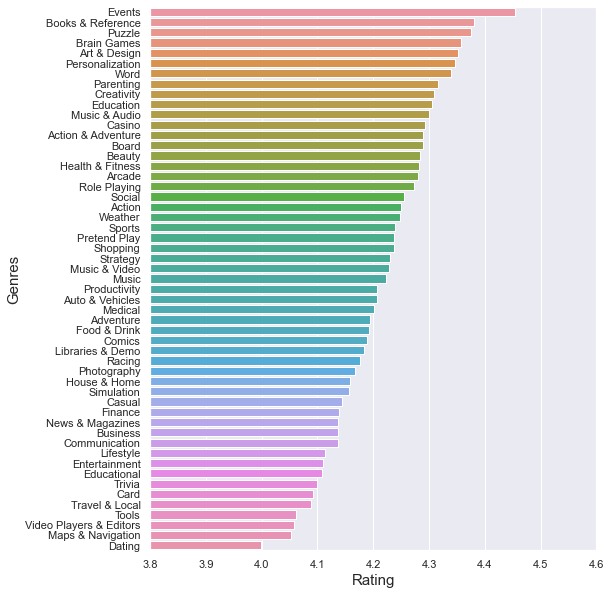

In [433]:
plt.figure(figsize=(8, 10))
sns.barplot(y=most_popular_genres.index, x=RATING, data=most_popular_genres).set(xlim=(3.8, 4.6))

[(3.8, 4.6)]

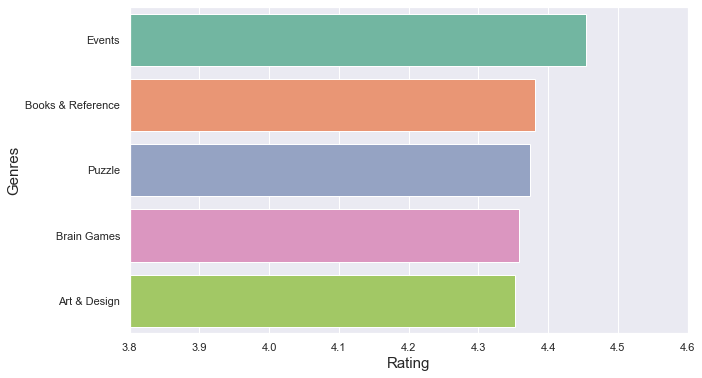

In [434]:
sns.barplot(y=most_popular_genres.index[:5], x=RATING, data=most_popular_genres.head(5)).set(xlim=(3.8, 4.6))

**These are the top rated genres in the Google PlayStore.** <br>
<br>
*We've just cut the x-axis, to get an clearer picture.*

In [435]:
genre_rating_count = (
    df_cleaned.pivot_table(index=GENRE, values=RATING, aggfunc=[MEAN, COUNT])
    .droplevel(1, axis=1)
    .sort_values(by=[MEAN, COUNT], ascending=False)
)
genre_rating_count.head()

,mean,count
Genres,,
Events,4.454688,64
Books & Reference,4.380889,225
Puzzle,4.374648,142
Brain Games,4.357812,64
Art & Design,4.352308,65


**Is there a relationship between the rating and the number of published genre?**

<AxesSubplot:xlabel='count', ylabel='mean'>

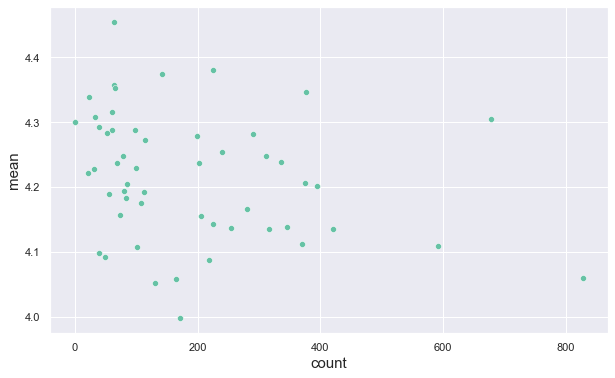

In [436]:
sns.scatterplot(x=COUNT, y=MEAN, data=genre_rating_count)

,mean,count
mean,1.000000,-0.267719
count,-0.267719,1.000000


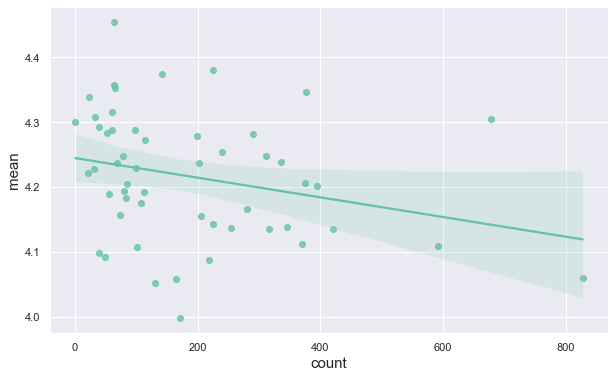

In [437]:
sns.regplot(x=COUNT, y=MEAN, data=genre_rating_count)
genre_rating_count.corr()

There are only a few data over a count of 500. <br>
Let's slice these and take a closer look.

,mean,count
mean,1.000000,-0.232395
count,-0.232395,1.000000


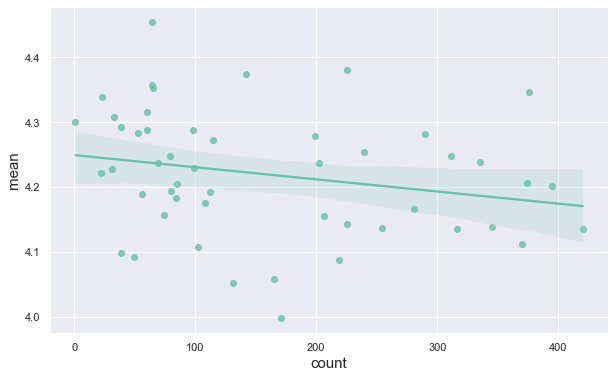

In [438]:
genre_rating_count_cut_by_500_count = genre_rating_count[genre_rating_count[COUNT] < 500]
sns.regplot(x=COUNT, y=MEAN, data=genre_rating_count_cut_by_500_count)
genre_rating_count_cut_by_500_count.corr()

We can visual recognize an weak downtrend of the rating. <br>
However, the correlation between these two variables is so low that we cannot find any significant correlation between them!

##### Conclusion

The top published genres are: &nbsp; `[Tools, Education, Entertainment, Business, Medical]` <br>

The top rated genres are: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; `[Events, Books, Puzzle, Brain Games, Art & Design]` <br>

We could not find an significant relationship between the rating and the number of published genres.

#### Genre - Best download rate

##### Exploring the data

**Genres by download rate**

In [439]:
genres_downloads_mean = df_cleaned.pivot_table(index=GENRE, values=DOWNLOADS, aggfunc=MEAN).sort_values(by=DOWNLOADS, ascending=False)
genres_downloads_mean.head()

,Downloads
Genres,
Communication,3.493284e+07
Video Players & Editors,2.386002e+07
Social,2.296179e+07
Arcade,1.910221e+07
Photography,1.654501e+07


In [440]:
column_order = [TOP, HIGH, MEDIUM, LOW]
download_rate_order = [HIGH, MEDIUM, LOW]
genres_downloads_group = df_cleaned.pivot_table(index=GENRE, values=DOWNLOADS, columns=DOWNLOAD_RATE, aggfunc=COUNT).sort_values(by=download_rate_order, ascending=False)[column_order]
genres_downloads_group.head()

Download Rate,Top,High,Medium,Low
Genres,,,,
Tools,134.0,139.0,125.0,429.0
Education,25.0,114.0,112.0,427.0
Entertainment,66.0,113.0,113.0,300.0
Action,99.0,90.0,63.0,59.0
Health & Fitness,34.0,79.0,60.0,117.0


In [441]:
genres_downloads_group_total_counts = genres_downloads_group.sum(axis=1)
genres_downloads_group_prop = genres_downloads_group.apply(lambda column: column / genres_downloads_group_total_counts)
genres_downloads_group_prop = genres_downloads_group_prop.sort_values(by=download_rate_order, ascending=False)
genres_downloads_group_prop.head()

Download Rate,Top,High,Medium,Low
Genres,,,,
Creativity,0.090909,0.454545,0.272727,0.181818
Pretend Play,0.188406,0.391304,0.144928,0.275362
Word,0.260870,0.391304,0.043478,0.304348
Music & Video,0.225806,0.387097,0.322581,0.064516
Strategy,0.222222,0.383838,0.222222,0.171717


<AxesSubplot:ylabel='Genres'>

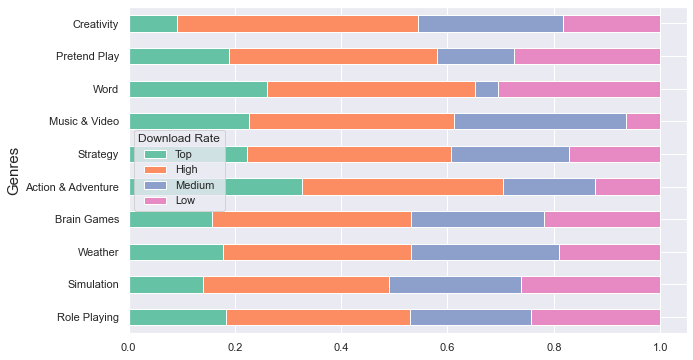

In [442]:
genres_downloads_group_prop.head(10)[::-1].plot.barh(stacked=True)

In [443]:
genres_downloads_group_prop.corr()

Download Rate,Top,High,Medium,Low
Download Rate,,,,
Top,1.000000,0.380895,-0.316925,-0.673261
High,0.380895,1.000000,0.047206,-0.829312
Medium,-0.316925,0.047206,1.000000,-0.305743
Low,-0.673261,-0.829312,-0.305743,1.000000


In [444]:
genres_downloads_group_prop.corr()

Download Rate,Top,High,Medium,Low
Download Rate,,,,
Top,1.000000,0.380895,-0.316925,-0.673261
High,0.380895,1.000000,0.047206,-0.829312
Medium,-0.316925,0.047206,1.000000,-0.305743
Low,-0.673261,-0.829312,-0.305743,1.000000


Download Rate
Top    -0.673261
High   -0.829312
Low     1.000000
Name: Low, dtype: float64

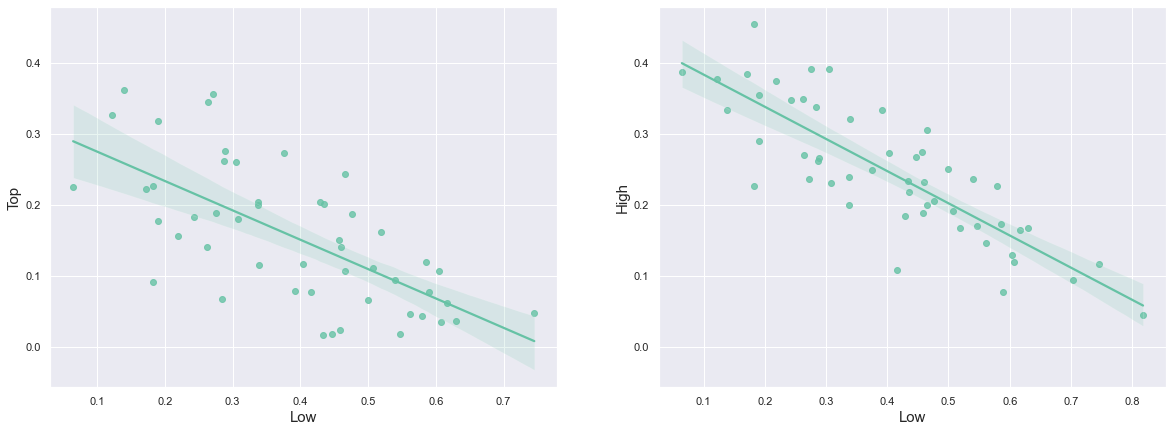

In [445]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
ax1, ax2 = axes
ax1.sharey(ax2)

sns.regplot(x=LOW, y=TOP, data=genres_downloads_group_prop, ax=ax1)
sns.regplot(x=LOW, y=HIGH, data=genres_downloads_group_prop, ax=ax2)

genres_downloads_group_prop[[TOP, HIGH, LOW]].corr().iloc[-1]

The extreme edges Top & Low and High & Low got an significant correlation/relationship to each other. <br>
That sounds logical, because as higher the rating is, as lower the low rating will be. 

**Top 5 genre which has the highest chance to be Top downloaded**

In [446]:
genres_downloads_group_prop.sort_values(by=TOP, ascending=False).head()

Download Rate,Top,High,Medium,Low
Genres,,,,
Racing,0.361111,0.333333,0.166667,0.138889
Arcade,0.356784,0.236181,0.135678,0.271357
Photography,0.345196,0.270463,0.120996,0.263345
Action & Adventure,0.326531,0.377551,0.173469,0.122449
Action,0.318328,0.289389,0.202572,0.189711


**Top 5 genre which has the highest chance to be High downloaded**

In [447]:
genres_downloads_group_prop.sort_values(by=HIGH, ascending=False).head()

Download Rate,Top,High,Medium,Low
Genres,,,,
Creativity,0.090909,0.454545,0.272727,0.181818
Pretend Play,0.188406,0.391304,0.144928,0.275362
Word,0.260870,0.391304,0.043478,0.304348
Music & Video,0.225806,0.387097,0.322581,0.064516
Strategy,0.222222,0.383838,0.222222,0.171717


**which 5 genre have the lowest proportion of bad reviews**

In [448]:
genres_downloads_group_prop.sort_values(by=LOW).head()

Download Rate,Top,High,Medium,Low
Genres,,,,
Music & Video,0.225806,0.387097,0.322581,0.064516
Action & Adventure,0.326531,0.377551,0.173469,0.122449
Racing,0.361111,0.333333,0.166667,0.138889
Strategy,0.222222,0.383838,0.222222,0.171717
Music,0.227273,0.227273,0.363636,0.181818


Download Rate,Top,High,Medium,Low,cum_top_high
Genres,,,,,
Action & Adventure,0.326531,0.377551,0.173469,0.122449,0.704082
Racing,0.361111,0.333333,0.166667,0.138889,0.694444
Word,0.260870,0.391304,0.043478,0.304348,0.652174
Photography,0.345196,0.270463,0.120996,0.263345,0.615658
Music & Video,0.225806,0.387097,0.322581,0.064516,0.612903


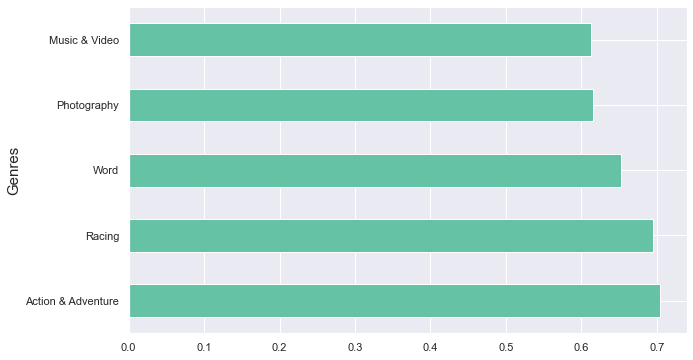

In [449]:
top_high_genres_downloads_group_prop = genres_downloads_group_prop.copy()
top_high_genres_downloads_group_prop["cum_top_high"] = top_high_genres_downloads_group_prop[TOP] + top_high_genres_downloads_group_prop[HIGH]
top5_top_high_genres_downloads_group_prop = top_high_genres_downloads_group_prop.sort_values(by="cum_top_high", ascending=False).head()
top5_top_high_genres_downloads_group_prop.iloc[:, -1].plot.barh(stacked=True)
top5_top_high_genres_downloads_group_prop

##### Conclusion

We found a significant negative correlation between Top & Low and High & Low download rates. That is good to know, because if we want to build an high or top downloaded app, we can assume that genres with an high downloads, we can assume that genres with a high download rate have a significantly higher probability of success in terms of our terms. <br>

With our prepared df we can just sort or extends the columns by our needs. <br>
We want to build a app with an good and secure download rate, we can sort the df by `LOW` ASC, and we get the genres with the lowest bad download rates. <br>
We want to build a app with an Top or High download rate, we can sort the df by an extension `cum_top_high` DESC, and we get the genres with the highest probability for a top or high download rate. <br>

### Content rating - Who rates the best

#### Exploring the data

,Rating
Content Group,
Everyone,8620
Teen,1036
Adults,396


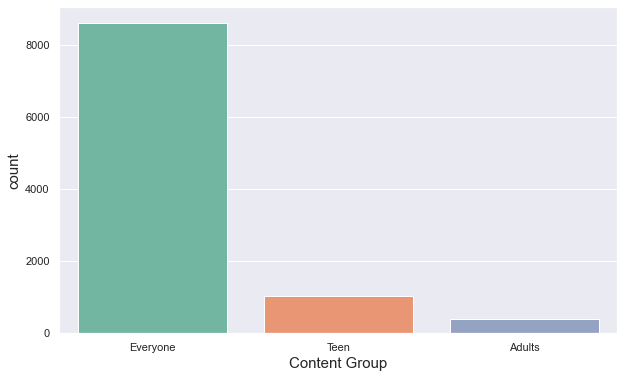

In [450]:
sns.countplot(x=CONTENT_GROUP, data=df_cleaned)
df_cleaned.pivot_table(index=CONTENT_GROUP, values=RATING, aggfunc=COUNT).sort_values(by=RATING, ascending=False)

,Rating
Content Group,
Teen,4.234122
Everyone,4.191224
Adults,4.126768


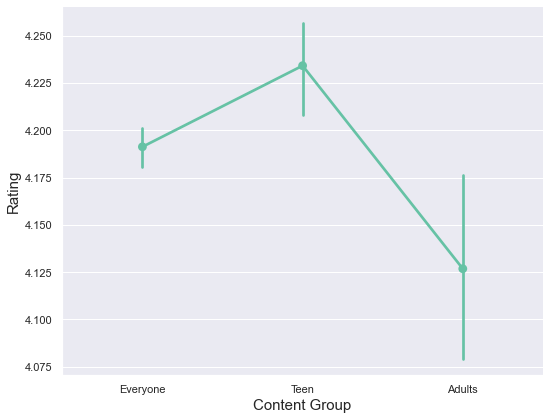

In [451]:
sns.catplot(x=CONTENT_GROUP, y=RATING, data=df_cleaned, kind=POINT, height=6, aspect=1.3)
df_cleaned.pivot_table(index=CONTENT_GROUP, values=RATING, aggfunc=MEAN).sort_values(by=RATING, ascending=False)

<AxesSubplot:xlabel='Content Group', ylabel='Rating'>

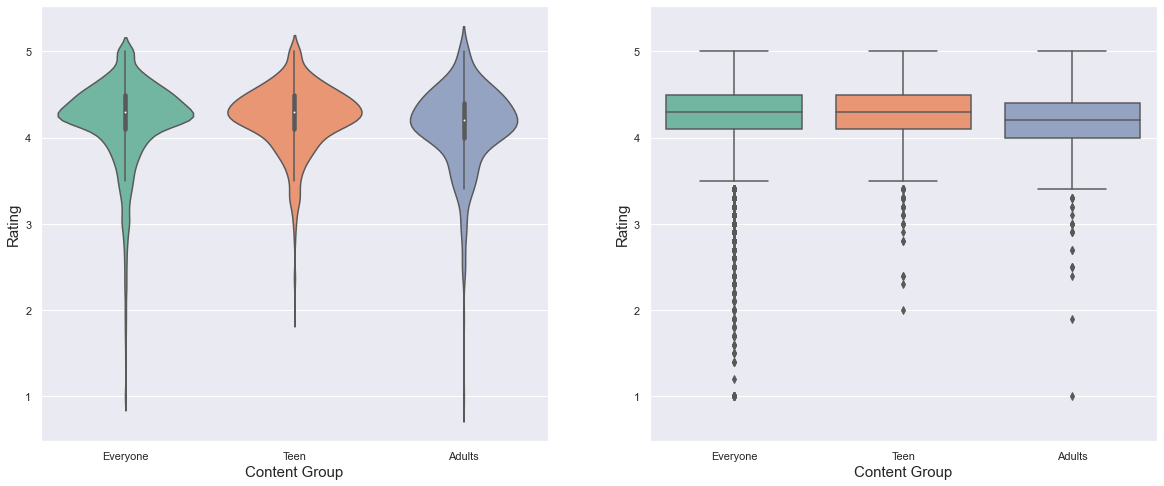

In [452]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1, ax2 = axes
ax2.sharey(ax1)
sns.violinplot(x=CONTENT_GROUP, y=RATING, data=df_cleaned, ax=ax1)
sns.boxplot(x=CONTENT_GROUP, y=RATING, data=df_cleaned, ax=ax2)
#sns.boxplot(hue=CONTENT_GROUP, x=RATING, data=df_cleaned, kind=POINT, height=6, aspect=1.3)

#### Conclusion

We can recognize, that teens are rating very better then adults do. The reason for that could be on one hand the low data density of the adults or on the other hand, the higher experience to other products or a general different areas of interests.

But note the big difference between the counts of the groups. The Adult group have just a few data.

### Content rating - Top rating count of genres

#### Exploring the data

In [453]:
genre_popularity_by_content_rating_group = df_cleaned.pivot_table(index=GENRE, columns=CONTENT_GROUP, values=RATING, aggfunc=COUNT).fillna(0)
genre_popularity_by_content_rating_group.head(2)

Content Group,Adults,Everyone,Teen
Genres,,,
Action,43.0,129.0,139.0
Action & Adventure,0.0,98.0,0.0


Genres
Dating              145.0
Social               45.0
Action               43.0
Entertainment        40.0
News & Magazines     11.0
Name: Adults, dtype: float64

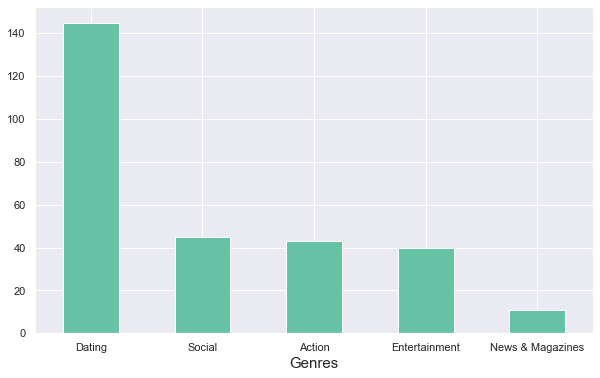

In [454]:
genre_popularity_by_content_rating_group_adults = genre_popularity_by_content_rating_group["Adults"].sort_values(ascending=False).head()
genre_popularity_by_content_rating_group_adults.plot.bar(rot=0)
genre_popularity_by_content_rating_group_adults

Genres
Action             139.0
Entertainment      138.0
Social             105.0
Personalization     51.0
Role Playing        45.0
Name: Teen, dtype: float64

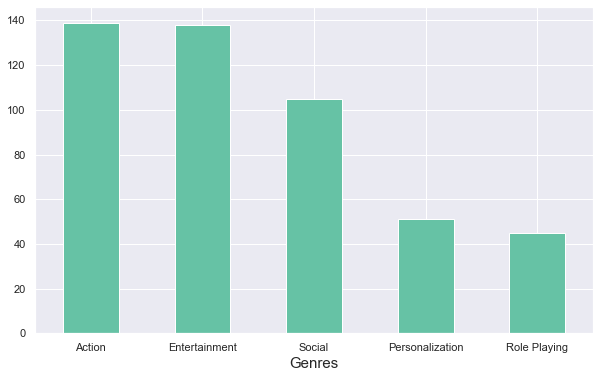

In [455]:
genre_popularity_by_content_rating_group_teen = genre_popularity_by_content_rating_group["Teen"].sort_values(ascending=False).head()
genre_popularity_by_content_rating_group_teen.plot.bar(rot=0)
genre_popularity_by_content_rating_group_teen

Genres
Tools            820.0
Education        658.0
Entertainment    414.0
Business         406.0
Medical          385.0
Name: Everyone, dtype: float64

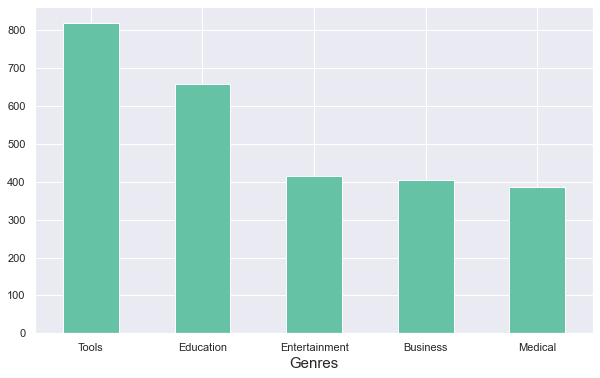

In [456]:
genre_popularity_by_content_rating_group_everyone = genre_popularity_by_content_rating_group["Everyone"].sort_values(ascending=False).head()
genre_popularity_by_content_rating_group_everyone.plot.bar(rot=0)
genre_popularity_by_content_rating_group_everyone

#### Conclusion

Here we can see the different areas of interests of the content rating groupes by the count.

### Content rating - Top rated genres

#### Exploring the data

In [457]:
is_gt_5_adults = genre_popularity_by_content_rating_group["Adults"] > 5
is_gt_5_teen = genre_popularity_by_content_rating_group["Teen"] > 5
is_gt_5_everyone = genre_popularity_by_content_rating_group["Everyone"] > 5

In [458]:
genre_top_rated_by_content_rating_group = df_cleaned.pivot_table(index=GENRE, columns=CONTENT_GROUP, values=RATING, aggfunc=MEAN).fillna(0)
genre_top_rated_by_content_rating_group.head(2)

Content Group,Adults,Everyone,Teen
Genres,,,
Action,4.267442,4.255039,4.23741
Action & Adventure,0.000000,4.288776,0.00000


Genres
Personalization     4.488889
Adventure           4.316667
Communication       4.275000
Action              4.267442
News & Magazines    4.263636
Name: Adults, dtype: float64

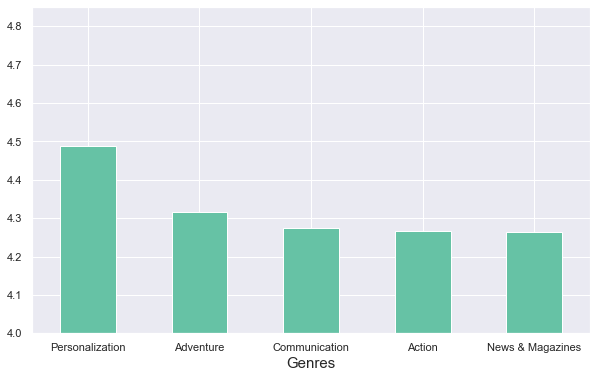

In [459]:
genre_top_rated_by_content_rating_group_adults = genre_top_rated_by_content_rating_group.loc[is_gt_5_adults, "Adults"].sort_values(ascending=False).head()
genre_top_rated_by_content_rating_group_adults.plot.bar(rot=0, ylim=(4, 4.85))
genre_top_rated_by_content_rating_group_adults

Genres
Events             4.537500
Education          4.480000
Puzzle             4.411765
Food & Drink       4.400000
Personalization    4.382353
Name: Teen, dtype: float64

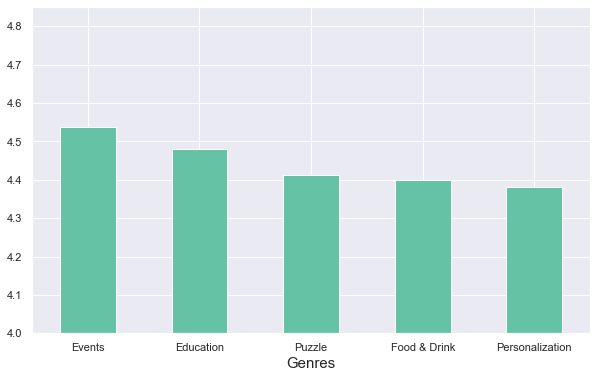

In [460]:
genre_top_rated_by_content_rating_group_teen = genre_top_rated_by_content_rating_group.loc[is_gt_5_teen, "Teen"].sort_values(ascending=False).head()
genre_top_rated_by_content_rating_group_teen.plot.bar(rot=0, ylim=(4, 4.85))
genre_top_rated_by_content_rating_group_teen

Genres
Events               4.442857
Books & Reference    4.390732
Word                 4.375000
Puzzle               4.369600
Brain Games          4.357812
Name: Everyone, dtype: float64

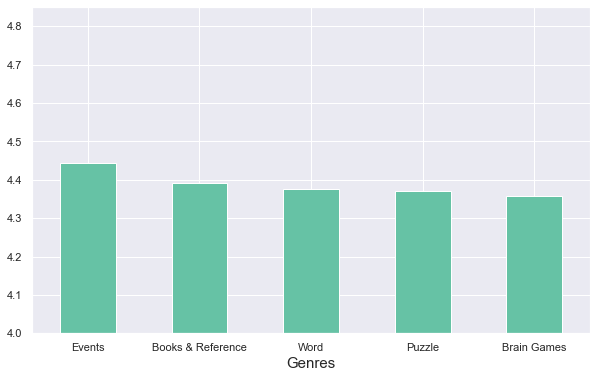

In [461]:
genre_top_rated_by_content_rating_group_everyone = genre_top_rated_by_content_rating_group.loc[is_gt_5_everyone, "Everyone"].sort_values(ascending=False).head()
genre_top_rated_by_content_rating_group_everyone.plot.bar(rot=0, ylim=(4, 4.85))
genre_top_rated_by_content_rating_group_everyone

#### Conclusion

Here we can see, which genres are very popular for the different content rating gropes.

### Rating - Does higher rated apps have an higher download rate?

#### Exploring the data

,Rating
Download Rate,
Top,4.316078
High,4.221079
Low,4.160386
Medium,4.144337


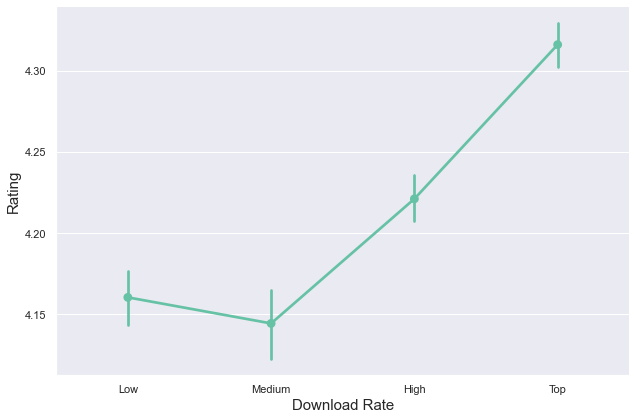

In [462]:
sns.catplot(x=DOWNLOAD_RATE, y=RATING, data=df_cleaned, kind=POINT, height=6, aspect=1.5)
df_cleaned.pivot_table(index=DOWNLOAD_RATE, values=RATING, aggfunc=MEAN).sort_values(by=RATING, ascending=False)

<AxesSubplot:xlabel='Download Rate', ylabel='Rating'>

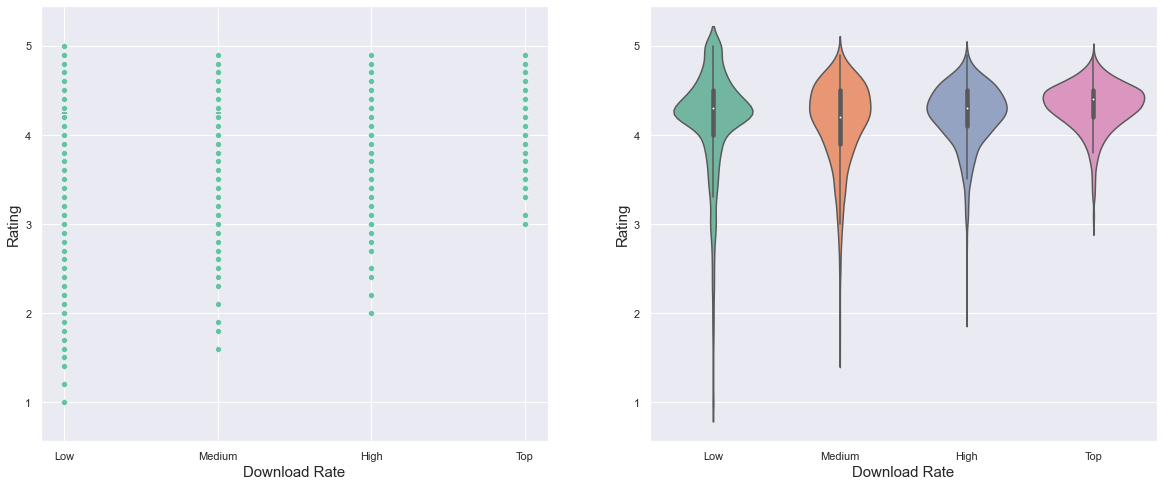

In [463]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1, ax2 = axes
ax1.sharey(ax2)
sns.scatterplot(x=DOWNLOAD_RATE, y=RATING, data=df_cleaned, ax=ax1)
sns.violinplot(x=DOWNLOAD_RATE, y=RATING, data=df_cleaned, ax=ax2)

#### Conclusion

As we can see, the higher the download rate goes, the higher is the rating. <br>
That sound logical, because only good/great apps will be downloaded millions of times.

### Rating - How is the total rating distribution over all apps ((0.5 - 5) categories)?

<AxesSubplot:xlabel='Rating Class', ylabel='count'>

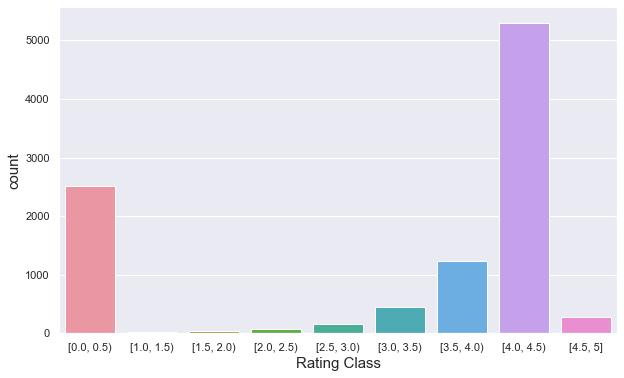

In [464]:
sns.countplot(x=RATING_CLASS, data=df_cleaned)

The most ratings are in the interval of 4 and 4.5. <br>
There are also a lot ratings under 0.5 (in avg).

### Rating - Got a app with many reviews an better rating? Is there a significant threshold?

#### Exploring the data

<AxesSubplot:xlabel='Reviews', ylabel='Rating'>

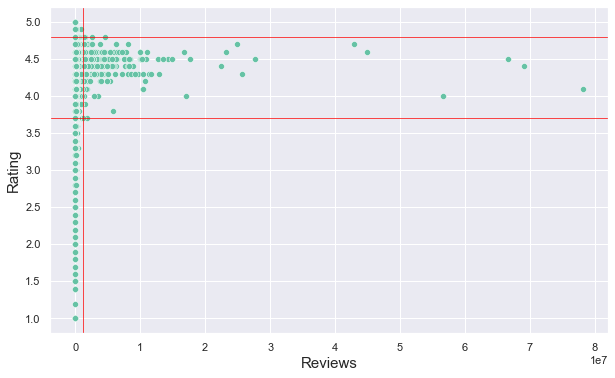

In [510]:
plt.axhline(y=3.7, color="red", linewidth=.7)
plt.axhline(y=4.8, color="red", linewidth=.7)
plt.axvline(x=1200000, color="red", linewidth=.7)
sns.scatterplot(x=REVIEWS, y=RATING, data=df_cleaned)

Okay. Here we can see some interesting things. <br>
<ol>
    <li>Over just about 1200000 reviews, there aren't ratings under 3.7</li>
    <li>But also just about 1200000 reviews, there aren't rating over 4.8</li>
</ol>

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

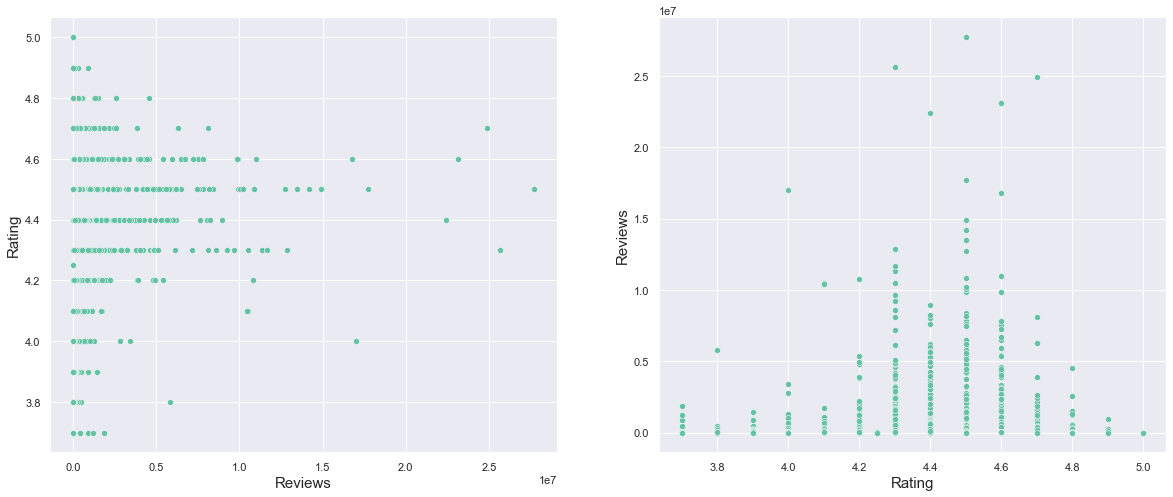

In [520]:
rating_review_cut_3f7 = df_cleaned[(df_cleaned[RATING] > 3.65) & (df_cleaned[REVIEWS] <= 30000000)]

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1, ax2 = axes

sns.scatterplot(x=REVIEWS, y=RATING, data=rating_review_cut_3f7, ax=ax1)
sns.scatterplot(x=RATING, y=REVIEWS, data=rating_review_cut_3f7, ax=ax2)

#### Conclusion

We just saw, that the higher the review rate is, the higher is the rating. Sure, because good/great apps will be more downloaded and gets more reviews. And because there are good/great, they get great ratings<br>

But there is also an upper limit. If the review rate rises over about 1200000, the rating do never goes over 4.8 again. But thats just logical. With that much reviews, it is almost impossible to get a perfect rating.

### Rating - Is there an relationship between the rating and the size of the app? Do bigger apps got an better rating, because of the higher functionality density?

#### Exploring the data

#### Conclusion

### NEXT